In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
 
}
</style>
""")

# What is Overlay?

### Short Version

Overlay is a cryptocurrency that allows users to make and lose money on nearly any streaming data. It recreates the dynamics of trading, but without counterparties. Thus it completely solves the liquidity problems which beset similar systems like cash-settled futures and scalar prediction markets.

### Longer Version
There are some sources of streaming data (price data is a paradigm, but it could be CPI numbers, weather data, crime rate, etc.) and holders of OVL "buy" or "sell" these data points through some interface. The data value at the time of the "trade" is saved to the blockchain. At a later time when the "trade" is unwound the value of the streaming data is queried again, compared to the value in the blockchain, and a simple return is calculated. The original amount of OVL committed to the "trade" is multiplied by the return. *The OVL in a user's wallet is minted or burned dynamically, based on the "trades" the user makes.*

# What are Some Killer Use Cases?

Like an organism from a single cell, Overlay is based on a simple idea which unfolds into a beautiful and complex system. Some consequences of the system are:

-  Overlay solves liquidity problems. Most data sources are not tradable, either on a futures market or a prediction market, because sellers and buyers must be matched. Significant trader interest must already exist to make such markets tradable, and so very few of such possible markets are actual.
-  The Overlay system can easily set fees negative, thus paying users to trade and providing a powerful incentive to attract users in the early days and drive network effects. These negative fees can also be offered whenever the system is deflationary and can afford to attract more traders. 
-  Global data sources and interest in monetizing data will continue to grow, with no end in sight. Overlay has enormous potential to serve as a go-to platform which offers investors, hedgers, and speculators exposure to financial instruments they cannot get anywhere else.
-  As a consequence of the previous point, a mature Overlay market would establish OVL as an entirely new class of financial derivative, in its own right. It would also allow higher-level derivatives like futures and options to be defined on extremely illiquid markets.
-  Overlay allows for the easy synthetic construction of a crypto (or any) portfolio. It thus simulates a universal cryptocurrency wallet without the need to maintain multiple nodes or keep money on an exchange.
-  Because there are no counterparties, there is no price impact. Any OVL trade, of any amount, settles at a single price.



# From Problem to Solution

To provide the greatest context for the idea, and to help understand how it is innovative, we will start with a well-known problem, and using alchemy transform it into a series of increasingly tractable problems.

### PROBLEM: <br>How can we monetize streaming data that is just a number?


Price is streaming data formed by buyers and sellers, and is extremely interesting because it is monetized. Most streaming data is not formed in this way and is not monetizable. Obvious examples abound, the most relevant ones are data values derived from prices, like the S&P 500 and VIX.

### SOLUTION:<br>Cash-settled futures markets and scalar prediction markets.


Most futures markets have physical settlement: a coffee future contract can result in delivery of a truck of 200 lb burlap sacks. Cash-settled futures result in payouts. When the contract expires, all parties settle in cash at the data level, and the result is to allow for synthetic ownership, i.e. monetization of the underyling data stream. Scalar prediction markets are essentially cash-settled futures: they set a band within which a data value is predicted to remain, and upon expiry all parties settle in cash. This solution works, but it gives rise to a new problem:

###  PROBLEM:<br>Liquidity is only available for hugely popular data streams.

Only a handful of the possible data streams can be monetized with futures or prediction markets because of the liquidity problem caused by the nature of exchange itself: every buyer needs to be matched with a seller. To my knowledge there have been no serious attempts to address this problem. 


### SOLUTION:<br>A cryptocurrency which allows synthetic ownership without exchange.

The novelty of Overlay is that it allows for any data stream to be monetized and it solves the liquidity problem by doing away with exchange. The cryptocurrency plays the role of a trading platform like Interactive Brokers, which gives users access to various tradable instruments. It is not quite right to say there are no counterparties, because now the counterparty is the entire user base, the Overlay system itself. Overlay solves the first and second problems completely, but it replaces them with another hard problem. 


### PROBLEM<br> How to control the currency supply of OVL to avoid hyperinflation?

Overlay is only interesting if users can redeem it for their favorite currency without too much slippage. Thus there needs to be liquid OVL secondary markets on exchanges. However, if new OVL supply floods the system then the price of OVL on exchanges can plummet, causing the users of OVL to abandon the system. 


### SOLUTION:<br>Caps. 

If the amount of new OVL available to mint at a given time is capped, there is no inflation problem. The max_supply of OVL is greater than or equal to the current_supply of OVL, and the difference is the buffer, the total amount users can pull from the system. The max_supply should be dynamic. For example it could grow linearly (10 OVL are added per block), nonlinearly in an error-function-like curve (BTC and ETH issuance), or be constant until the buffer is distressed (quantitative easing). The max_supply could even shrink in some situations. Users of OVL can know that the currency supply will always be less than or equal to a given number. 


 ### PROBLEM:<br>How to assure that the buffer stays large enough?


We have actually now come full circle, because this is a liquidity problem, but of quite a different sort than the one in problem #2. If the buffer drops to zero the system must react. If the buffer stays at zero no users can redeem their positions, and it becomes unlikely then that they will enter new positions. If users even suspect that this is about to happen, the system is likely to experience a crisis.  



### SOLUTION:<br>Trader caps and dynamic fees.

The best situation is that the buffer never gets small and either stays roughly constant or is always growing. The first problem to solve is the case of black swan windfalls when a trader makes millions of OVL by betting 1 OVL. (This can happen if a trader shorts any amount at any price and the data feed crashes to near zero.) This problem is easy though: all traders have a max_bet, and a max_payout. The max_bet can depend on the number of active traders and the current buffer size, among other things. The max_payout can be large, like 10*max_bet. This will help assure that the buffer is not destroyed by black swan windfalls. 
Even if we assume moderate wins per trade, however, it is by no means obvious that the buffer will still stay large enough. It is quite surprising that dynamic fees solve this problem.


# Modeling Dynamic Fees

## Data

We start by setting up a data feed which we can control. The histogram below shows the distribution, which is just random normal. The positive values are green and the negative are red. 

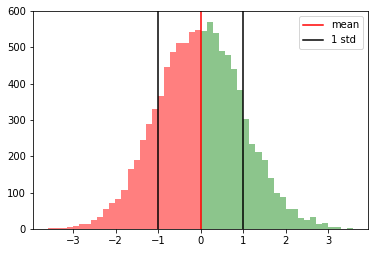

In [122]:
distribution = np.random.normal
samples = []
for i in range(10000):
    samples.append(distribution(
        loc=0,     #the average value of the distribution
        scale=1)   #the standard deviation (spread, or width) of the distribution 
    )
pos = [x for x in samples if x>0]
neg = [x for x in samples if x<=0]
hist = plt.hist(pos, bins=25, color='g', alpha=.45)
hist = plt.hist(neg, bins=25, color='r', alpha=.5)
plt.axvline(0, c='r', label='mean')
plt.axvline(1, c='k', label='1 std')
plt.axvline(-1, c='k')
plt.legend()
plt.show()


We get our price values through time by taking the cumulative sum of these deltas. Disregard the negative prices, that's just a fluke of the randomness we can control for by starting the market at a different price.


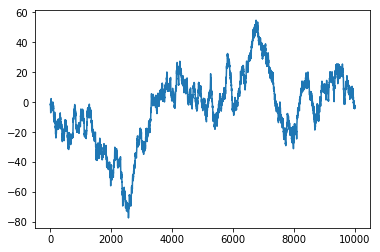

In [73]:
cumsum = np.cumsum(samples)
plt.plot(cumsum)
plt.show()

We can change the volatility by changing the standard distribution, causing much larger price swings

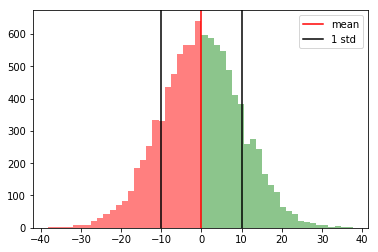

In [76]:
distribution = np.random.normal
samples2 = []
for i in range(10000):
    samples2.append(distribution(
        loc=0,     #the average value of the distribution
        scale=10)   #the standard deviation (spread, or width) of the distribution 
    )
pos = [x for x in samples2 if x>0]
neg = [x for x in samples2 if x<=0]
hist = plt.hist(pos, bins=25, color='g', alpha=.45)
hist = plt.hist(neg, bins=25, color='r', alpha=.5)
plt.axvline(0, c='r', label='mean')
plt.axvline(10, c='k', label='1 std')
plt.axvline(-10, c='k')
plt.legend()
plt.show()

The previous chart is also plotted for comparison. 

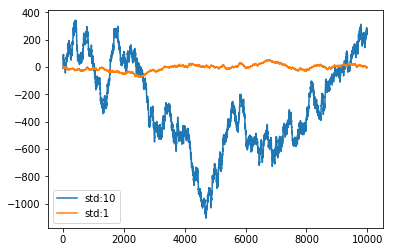

In [81]:
cumsum = np.cumsum(samples)
cumsum2 = np.cumsum(samples2)
plt.plot(cumsum2, label='std:10')
plt.plot(cumsum, label='std:1')
plt.legend()
plt.show()

We can make the market trend up or down by changing the mean value of the distribution. A shift of a single standard deviation upwards has a profound impact on the market through time.  

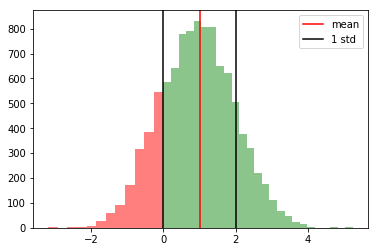

In [55]:
samples = []
for i in range(10000):
    samples.append(distribution(
        loc=1,     #the average value of the distribution
        scale=1)   #the standard deviation (spread, or width) of the distribution 
    )
pos = [x for x in samples if x>0]
neg = [x for x in samples if x<=0]
hist = plt.hist(pos, bins=25, color='g', alpha=.45)
hist = plt.hist(neg, bins=12, color='r', alpha=.5)
plt.axvline(1, c='r', label='mean')
plt.axvline(2, c='k', label='1 std')
plt.axvline(0, c='k')
plt.legend()
plt.show()

Not random globally, looks just like the line $y = x$. 

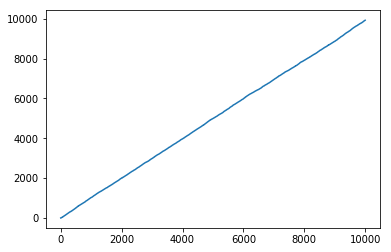

In [37]:
cumsum = np.cumsum(samples)
plt.plot(cumsum)
plt.show()

Locally, the randomness is more evident.

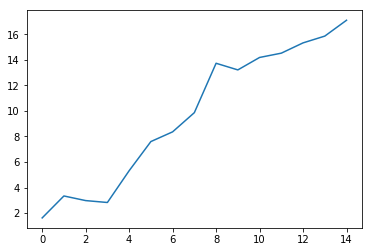

In [67]:
cumsum = np.cumsum(samples[1110:1125])
plt.plot(cumsum)
plt.show()

Even a very slight shift in the mean has a profound effect. This is a counterintuitive feature of statistics and why statistical reasoning is simultaneously so powerful and so poorly understood by most people. Below we shift the mean up by only .05

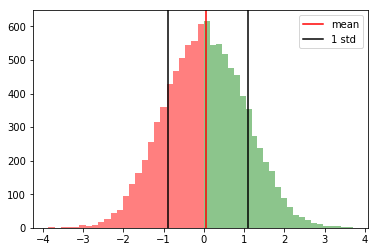

In [103]:
samples = []
for i in range(10000):
    samples.append(distribution(
        loc=.05,     #the average value of the distribution
        scale=1)     #the standard deviation (spread, or width) of the distribution 
    )
pos = [x for x in samples if x>0]
neg = [x for x in samples if x<=0]
hist = plt.hist(pos, bins=25, color='g', alpha=.45)
hist = plt.hist(neg, bins=25, color='r', alpha=.5)
plt.axvline(.05, c='r', label='mean')
plt.axvline(1.1, c='k', label='1 std')
plt.axvline(-.9, c='k')
plt.legend()
plt.show()

This is still far from random gobally, the slope is approximately 5/100 or .05

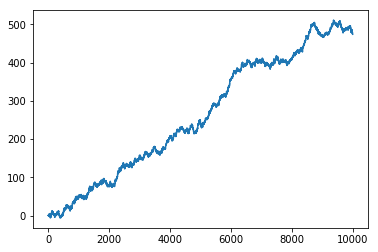

In [104]:
cumsum = np.cumsum(samples)
plt.plot(cumsum)
plt.show()

Locally the randomness is much more evident

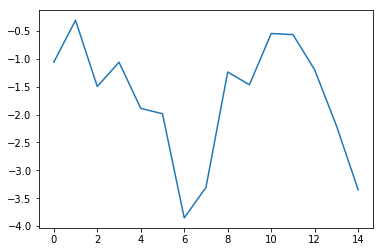

In [105]:
cumsum = np.cumsum(samples[1110:1125])
plt.plot(cumsum)
plt.show()

## Traders

We now add traders to these markets. The logic here can get arbitrarily complex. Below we have a trader who, at each time step, has a $33\%$ chance of trading. Upon _entry_ a side is chosen by coin toss, and at each trade the trader commits all capital.

The `price_action` plot shows the price along with the trades made. The `P&L` chart shows the real-time, marked-to-market profit and loss of the trader. 

We run the model for one year, supposing that each step is a day. 

<img src="res/num_traders=1_feed_dist_mean=0_num_steps=365_free_fee=0.0_num_runs=1_issue=0_strat=Enter,Exit_0_PL.png">

It may seem unrealistic to pursue this model, but it is useful because trader luck and skill (and the opposite) can be simulated without writing any trading strategies. This is done by increasing the probability of trades going in the direction of a controlled trend. In the below chart, the market is trending up and the trader is twice as likely to go long as short upon entry.

<img src="res/feed_dist_mean=10_num_runs=1_num_traders=1_free_fee=0.0_strat=LongEnter,Exit_issue=0_num_steps=365_0_PL.png">

We may also control the frequency of trades through the entry and exit probabilities. Keeping everything form the previous chart except reducing the percentage of a trade to $2\%$ we get the following. (Note that the `LongEnter` strategy has a 1/3 chance of going short, so despite having a winning strategy this trader gets unlucky.)


<img src="res/num_runs=1_strat=LongEnter,Exit_num_steps=365_free_fee=0.0_feed_dist_mean=10_issue=0_num_traders=1_0_PL.png">

## Agent-Based Modeling

What we are actually interested in are statistical features of this model, so we add many more traders, and we do many runs of the same parameters to look for regularities. 

Below, the top chart is the earned wealth of the 100 traders _on aggregate_ (i.e. the sum of all traders' wealth). The middle chart is the buffer, and the bottom chart is the currency supply. The charts on the right are rotated histograms of the outcomes.   

Each line on each chart is a separate run of the model. Each run is a complete reset and is independent of all other runs. As is clear, these three quantities are essentially the same thing: changes in earned wealth just are changes in currency supply, and changes in the buffer are the same, but inverted. We bother charting them all because there are ways of decoupling them.

The results are entirely expected: the outcomes roughly follow a random normal distribution, with the mean outcome being no different than the initial state.

<img src='res/num_traders=100_feed_dist_mean=0_strat=Enter,Exit_issue=0_num_runs=100_exit_prob=0.33_num_steps=365_free_fee=0.0_entry_prob=0.33_0.png' style="width: 2000px;"/>


The `issue` variable describes how many OVL are added per time step to the `max_supply`. Such 'issuance' does not actually affect the OVL currency supply, but it does affect the buffer. Changing the `issue` parameter to 10 and otherwise leaving the model unchanged, results in a decoupling of the `buffer` from the `earned_wealth` and `curency_supply`.

<img src='res/num_traders=100_num_steps=365_feed_dist_mean=0_exit_prob=0.33_num_runs=100_free_fee=0.0_issue=10_strat=Enter,Exit_entry_prob=0.33_0.png' style="width: 2000px;"/>

Now, if we set `issue` to 0 again, but change the `free_fee` to 10 basis points ($.1\%$ of each trade size), all variables are coupled again, but the result is profound: 

<img src="res/free_fee=0.001_entry_prob=0.33_feed_dist_mean=0_num_traders=100_exit_prob=0.33_num_runs=100_issue=0_num_steps=365_strat=Enter,Exit_0.png"  style="width: 2000px;"/>


Over the course of a year, 10 basis points shifts the average performance down $10\%$. This is for traders who trade, on balance, once every three days. If we reduce the trading frequency to once per month, we obtain a decidedly more modest result (eyeballing it, it looks like fees take about $1\%$ of `earned_wealth` on average):

<img src="res/issue=0_num_runs=100_num_traders=100_feed_dist_mean=0_strat=Enter,Exit_free_fee=0.001_exit_prob=0.033_num_steps=365_entry_prob=0.033_0.png"  style="width: 2000px;"/>

If we run the exact same model for two years, the result of the fees is more apparent (fees take about $2\%$ of `earned_wealth` now):


<img src="res/num_traders=100_feed_dist_mean=0_entry_prob=0.033_free_fee=0.001_num_steps=730_issue=0_num_runs=100_strat=Enter,Exit_exit_prob=0.033_0.png"  style="width: 2000px;"/>

Finally, let us reset the trading frequency to once every three days, and run the model for a year. If we combine fees and issue, we get the expected result: while `earned_wealth` decreases by roughly $10\%$, the `buffer` increases by roughly $15\%$. 

<img src="res/entry_prob=0.33_feed_dist_mean=0_num_steps=365_issue=10_num_traders=100_exit_prob=0.33_strat=Enter,Exit_free_fee=0.001_num_runs=100_0.png"  style="width: 2000px;"/>

All of the above examples used a random market and random entry and exit parameters. How do fees affect the situation when traders, on aggregate, are winning? Below we look at a `LongEntry` strategy (i.e. twice as likely to go long than short), with a rising market, in the absence of fees and issue.

<img src="res/exit_prob=0.33_entry_prob=0.33_feed_dist_std=20_num_steps=365_num_runs=100_strat=LongEnter,Exit_feed_dist_mean=10_free_fee=0.0_issue=0_num_traders=100_px_start=10000.0_0.png"  style="width: 2000px;"/>

If we keep everything the same, and include a fee of 10 basis points, the pressue on the system is alleviated.


<img src="res/too_long.png"  style="width: 2000px;"/>

If we reduce the trading frequency by a factor of ten (one trade per month on average), the fees are less effective.

<img src="res/num_traders=100_num_runs=100_exit_prob=0.033_strat=LongEnter,Exit_feed_dist_std=20_entry_prob=0.033_px_start=10000.0_feed_dist_mean=10_num_steps=365_issue=0_free_fee=0.001_0.png"  style="width: 2000px;"/>

And if we have traders use a `AlwaysLongEnter` strategy in a market which trends strongly upwards, along with a low trading probability, we get a simulation of incredible trader skill, and a system which experiences a great deal of pressure:

<img src="res/num_steps=365_issue=0_feed_dist_mean=10_num_traders=100_num_runs=100_free_fee=0.001_px_start=10000.0_entry_prob=0.033_exit_prob=0.033_strat=AlwaysLongEnter,Exit_feed_dist_std=20_0.png"  style="width: 2000px;"/>

Doubling the fees, we get

<img src="res/exit_prob=0.033_entry_prob=0.033_feed_dist_mean=10_free_fee=0.002_num_steps=365_num_traders=100_px_start=10000.0_num_runs=100_strat=AlwaysLongEnter,Exit_feed_dist_std=20_issue=0_0.png"  style="width: 2000px;"/>

Tripling the fees (which is now getting a little expensive):

<img src="res/exit_prob=0.033_entry_prob=0.033_feed_dist_std=20_num_steps=365_issue=0_px_start=10000.0_num_traders=100_num_runs=100_free_fee=0.003_strat=AlwaysLongEnter,Exit_feed_dist_mean=10_0.png"  style="width: 2000px;"/>

The higher fees go, the fewer users we will have and the fewer new trades will be entered. If, instead of raising fees to deal with trader luck and skill, we allow for some inflation in the system, we can maintain the buffer. The following chart shows what happens when we charge 25 basis points fee, and issue 50 OVL per day to the `max_supply`. The result is a system which experiences, at worst, $4\%$ inflation per year, and a trader population that makes $40\%$ return over the year. The buffer, in the worst case, loses only $20\%$.  

<img src="res/num_traders=100_feed_dist_std=20_exit_prob=0.033_issue=50_entry_prob=0.033_free_fee=0.0025_feed_dist_mean=10_num_steps=365_px_start=10000.0_num_runs=100_strat=AlwaysLongEnter,Exit_0.png"  style="width: 2000px;"/>

Running the model for two years gives the same result: the buffer is sustained in the face of what will probably be moderate inflation. 

<img src="res/num_runs=100_feed_dist_std=20_free_fee=0.0025_feed_dist_mean=10_num_steps=730_px_start=10000.0_strat=AlwaysLongEnter,Exit_entry_prob=0.033_num_traders=100_exit_prob=0.033_issue=50_0.png"  style="width: 2000px;"/>

# Conclusion

We conclude that fees alone are sufficient to sustain and protect the system when traders are unskilled or unlucky.  In the case that traders collectively get very lucky, or have unusual skill, a combination of fees and inflation of the currency allows the system to maintain the buffer. Such periods are stressful, and there should be other safeguards available to deal with market shocks. We believe that dynamic fees based on a careful (and continually optimized) model for the optimal fee, will be a necessary component of the Overlay system. The encouraging analysis above shows a way for future work on the monetary policy.